# Task 4: SMS Spam Detection

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [3]:
#loading dataset
data = pd.read_csv('/content/spam.csv',encoding = 'ISO-8859-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#removing last 3 columns
data = data.drop(columns=data.columns[2:5])
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#changing name of columns for better understanding
data.columns = ['Category', 'Message']
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#checking the NULL values if any
data.isnull().sum()

,0
Category,0
Message,0


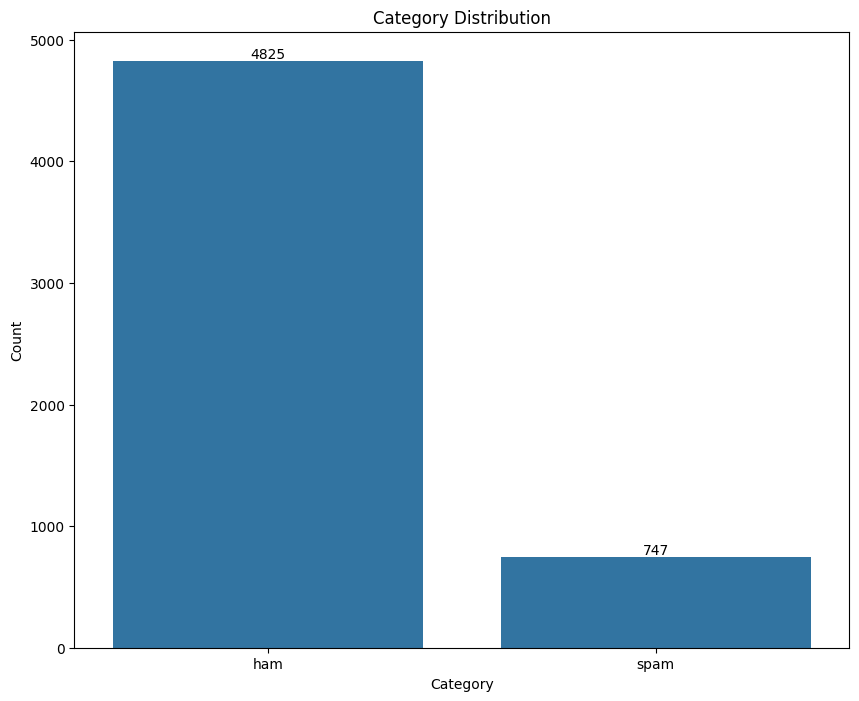

In [8]:
#Data Visualization
category_counts = data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
plt.figure(figsize=(10, 8))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

for i, count in enumerate(category_counts['Count']):
  plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [9]:
#Adding a new column spam where "ham" is denoted by 0 and spam is denoted by 1
data['spam']= data['Category'].apply(lambda x: 1 if x=='spam' else 0)
data.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
#Training and Testing of ML model
X_train, X_test, y_train, y_test = train_test_split(data.Message,data.spam, test_size=0.2)

#Fit on training data and transform it to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train.values)

In [11]:
#Native Bayes
model = MultinomialNB()
#model training
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [12]:
#Testing Model
X_test_tfidf = vectorizer.transform(X_test)
model.score(X_test_tfidf, y_test)

0.9668161434977578

In [13]:
#Function to Predict the Spam Messages
def predict_spam(message):
  message_tfidf = vectorizer.transform([message])
  prediction = model.predict(message_tfidf)
  if prediction[0] == 1:
    print("This is a spam message")
  else:
    print("This is not a spam message")

In [14]:
#Some messages

#1. Congratulations! You've won a free iPhone. Click here to claim.
#2. Urgent! Your account is suspended. Verify now: fakebank.com
#3. You have been selected for a ₹5000 cash prize. Call now!
#4. Hey, are we still meeting for lunch at 1?
#5. Happy Birthday! Hope you have a great day!
#6. Your account have 100 debeted, is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML

In [16]:
while True:
    user_input = input("Enter SMS (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    genre = predict_spam(user_input)
    print(genre)

Enter SMS (or type 'exit' to quit): Congratulations! You've won a free iPhone. Click here to claim.
This is a spam message
None
Enter SMS (or type 'exit' to quit): Urgent! Your account is suspended. Verify now: fakebank.com
This is a spam message
None
Enter SMS (or type 'exit' to quit): You have been selected for a ₹5000 cash prize. Call now!
This is a spam message
None
Enter SMS (or type 'exit' to quit): Hey, are we still meeting for lunch at 1?
This is not a spam message
None
Enter SMS (or type 'exit' to quit): Happy Birthday! Hope you have a great day!
This is not a spam message
None
Enter SMS (or type 'exit' to quit): Your account have 100 debeted, is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML
This is a spam message
None
Enter SMS (or type 'exit' to quit): exit
